# Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../../data/raw/laptop_data.csv')

In [3]:
data.head(10)

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life
5,7,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,34990,Intel Core i5 (11th Gen) Processor,Intel,32 GB Expandable,16 GB,DDR4 RAM,0,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45,45W Adapter
6,8,HP,HP 14s-fq1092AU (50M60PA) Laptop (14 Inch | AM...,49599,AMD Hexa-Core Ryzen 5,AMD,16 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,14,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 9 Hrs Battery Life
7,9,Acer,Acer One 14 Z8-415 (UN.599SI.018) Laptop (14 I...,39990,Intel Core i5 (11th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,2.5 Ghz Processor,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45,45W Adapter
8,10,Lenovo,Lenovo Ideapad S145 (81VD008PIN) Laptop (15.6 ...,33111,Intel Core i3 (8th Gen),Intel,12 GB Expandable,4 GB,DDR4 RAM,2.2 Ghz Processor,LED,15.6,UHD 620,Intel,NO SSD,1024 GB HDD Storage,45,45W Adapter
9,11,ASUS,ASUS TUF Gaming F15 FX506HF-HN075W Laptop (15....,48990,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,2.9 Ghz Processor,LCD,15.6,"GeForce RTX 2050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,150W Adapter


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

In [5]:
#Creating copy of data frame
df = data.copy()

### Remove unnecessary coulmns

In [6]:
df.shape

(3976, 18)

In [7]:
df = df.drop(columns=['Unnamed: 0', 'Name'])

In [8]:
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,HP,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,HP,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,Infinix,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [9]:
df.shape

(3976, 16)

In [10]:
df['Brand'].value_counts()

Brand
ASUS         989
Lenovo       811
HP           803
Dell         420
Acer         322
MSI          316
Samsung       61
Apple         49
Infinix       39
Microsoft     34
AVITA         23
Gigabyte      17
LG            15
Honor         14
iball         11
Xiaomi        10
Fujitsu        8
Zebronics      8
Wings          4
Colorful       3
Realme         3
Micromax       3
Coconics       3
Tecno          2
Smartron       2
Huawei         1
Razer          1
VAIO           1
Lava           1
Nokia          1
RDP            1
Name: count, dtype: int64

### Drop Duplicate Rows

In [11]:
df[df.duplicated()]

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
444,ASUS,42990,Intel Core i3 (13th Gen),Intel,16 GB Expandable,8 GB,DDR4 RAM,1.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 6 Hrs Battery Life
445,ASUS,42990,Intel Core i3 (13th Gen),Intel,16 GB Expandable,8 GB,DDR4 RAM,1.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 6 Hrs Battery Life
619,Acer,70990,Intel Core i5 (13th Gen) Processor,Intel,32 GB Expandable,16 GB,DDR5 RAM,0,LCD,15.6,"GeForce RTX 3050 GPU, 6 GB",NVIDIA,512 GB SSD Storage,No HDD,135,135W Adapter
653,Microsoft,99990,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB LP,LPDDR5 RAM,4.2 Ghz Processor,LCD,13,Integrated,Intel,256 GB SSD Storage,No HDD,65,Upto 15.5 Hrs Battery Life
896,ASUS,201990,AMD Octa-Core Ryzen 9,AMD,Not Expandable,16 GB,DDR5 RAM,4.8 Ghz Processor,LCD,15.6,"GeForce RTX 3070 Ti GPU, 8 GB",NVIDIA,1024 GB SSD Storage,No HDD,65,65W Adapter
1032,ASUS,69990,Intel Core i5 (12th Gen),Intel,Not Expandable,16 GB,DDR4 RAM,2.5 Ghz Processor,LCD,16,"GeForce RTX 2050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,120,120W Adapter
1315,ASUS,58990,Intel Core i5 (13th Gen),Intel,Not Expandable,16 GB,DDR4 RAM,1.3 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,45,Upto 6 Hrs Battery Life
1574,ASUS,81990,Intel Core i7 (8th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,1.8 Ghz Processor,LED,14,"GeForce MX150 GPU, 2 GB",NVIDIA,256 GB SSD Storage,1024 GB HDD Storage,42,42W Adapter
1813,ASUS,64990,Intel Core i5 (8th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,1.6 Ghz Processor,LED,14,UHD 620,Intel,256 GB SSD Storage,1024 GB HDD Storage,42,42W Adapter
1817,ASUS,64990,Intel Core i5 (8th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,1.6 Ghz Processor,LED,14,UHD 620,Intel,256 GB SSD Storage,1024 GB HDD Storage,42,42W Adapter


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df[df.duplicated()]

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life


In [14]:
df['Brand'].value_counts()

Brand
ASUS         976
Lenovo       808
HP           799
Dell         420
Acer         317
MSI          316
Samsung       61
Apple         48
Infinix       39
Microsoft     33
AVITA         23
Gigabyte      17
LG            15
Honor         14
iball         11
Xiaomi        10
Fujitsu        8
Zebronics      8
Wings          4
Colorful       3
Realme         3
Micromax       3
Coconics       3
Tecno          2
Smartron       2
Huawei         1
Razer          1
VAIO           1
Lava           1
Nokia          1
RDP            1
Name: count, dtype: int64

In [15]:
df.shape

(3949, 16)

In [16]:
# For every column
null_counts = df.isnull().sum()
print(null_counts)


Brand                0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64


In [17]:
print(df.dtypes)

Brand              object
Price               int64
Processor_Name     object
Processor_Brand    object
RAM_Expandable     object
RAM                object
RAM_TYPE           object
Ghz                object
Display_type       object
Display            object
GPU                object
GPU_Brand          object
SSD                object
HDD                object
Adapter            object
Battery_Life       object
dtype: object


### Clean by Feature

In [18]:
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,HP,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,HP,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,Infinix,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [19]:
print(df.columns)

Index(['Brand', 'Price', 'Processor_Name', 'Processor_Brand', 'RAM_Expandable',
       'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display', 'GPU', 'GPU_Brand',
       'SSD', 'HDD', 'Adapter', 'Battery_Life'],
      dtype='object')


#### Brand

In [20]:
print("Brand Unique Values:", df['Brand'].nunique())
print("Missing Brand values:", df['Brand'].isna().sum())
print(df['Brand'].value_counts())

Brand Unique Values: 31
Missing Brand values: 0
Brand
ASUS         976
Lenovo       808
HP           799
Dell         420
Acer         317
MSI          316
Samsung       61
Apple         48
Infinix       39
Microsoft     33
AVITA         23
Gigabyte      17
LG            15
Honor         14
iball         11
Xiaomi        10
Fujitsu        8
Zebronics      8
Wings          4
Colorful       3
Realme         3
Micromax       3
Coconics       3
Tecno          2
Smartron       2
Huawei         1
Razer          1
VAIO           1
Lava           1
Nokia          1
RDP            1
Name: count, dtype: int64


In [21]:
# Here I can consider low quantity brands as "Other" category
top_brands = ['ASUS', 'Lenovo', 'HP', 'Dell', 'Acer', 'MSI','Samsung','Apple']
df['Brand'] = df['Brand'].apply(lambda x: x if x in top_brands else 'Other')


In [22]:
print(df['Brand'].value_counts())

Brand
ASUS       976
Lenovo     808
HP         799
Dell       420
Acer       317
MSI        316
Other      204
Samsung     61
Apple       48
Name: count, dtype: int64


#### Price


In [23]:
df.shape

(3949, 16)

In [24]:
print("Price Unique Values:", df['Price'].nunique())
print("Missing Price values:", df['Price'].isna().sum())
print(df['Price'].value_counts())
print((df['Price'] == 0).any())    

Price Unique Values: 1799
Missing Price values: 0
Price
64990     40
49990     38
79990     38
34990     37
42990     36
          ..
48890      1
74390      1
51891      1
112980     1
36289      1
Name: count, Length: 1799, dtype: int64
False


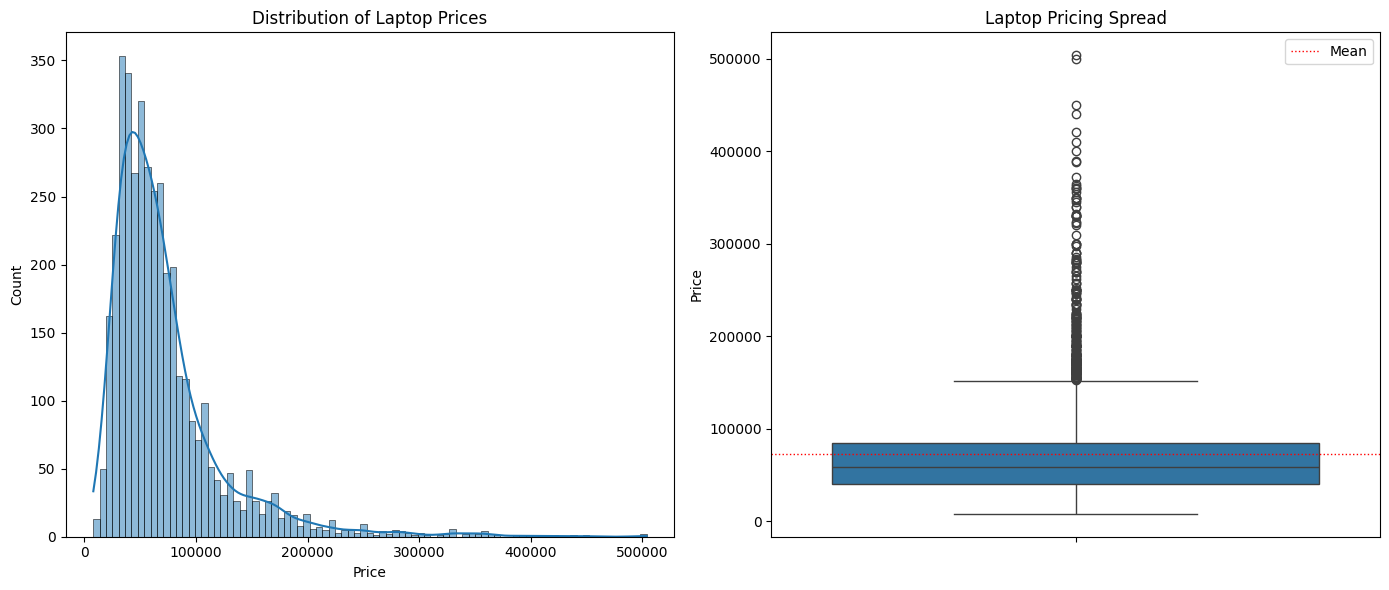

In [25]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mean_price = df['Price'].mean()
sns.histplot(df['Price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Laptop Prices')

sns.boxplot(data=df, y='Price', ax=axes[1])
axes[1].set_title('Laptop Pricing Spread')
axes[1].set_ylabel('Price')

axes[1].axhline(mean_price, color='red', linestyle=':', linewidth=1, label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

In [26]:
df.shape

(3949, 16)

In [27]:
df['Brand'].value_counts()

Brand
ASUS       976
Lenovo     808
HP         799
Dell       420
Acer       317
MSI        316
Other      204
Samsung     61
Apple       48
Name: count, dtype: int64

##### Removing Outliars ( Not Finalized)

In [28]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]


In [29]:
df.shape

(3670, 16)

In [30]:
df['Brand'].value_counts()

Brand
ASUS       889
Lenovo     772
HP         766
Dell       399
Acer       310
MSI        263
Other      189
Samsung     51
Apple       31
Name: count, dtype: int64

##### Converting IND RS to LKR

In [31]:
df['Price'] = df['Price'] * 3.5 # Get Average Exchange Rate

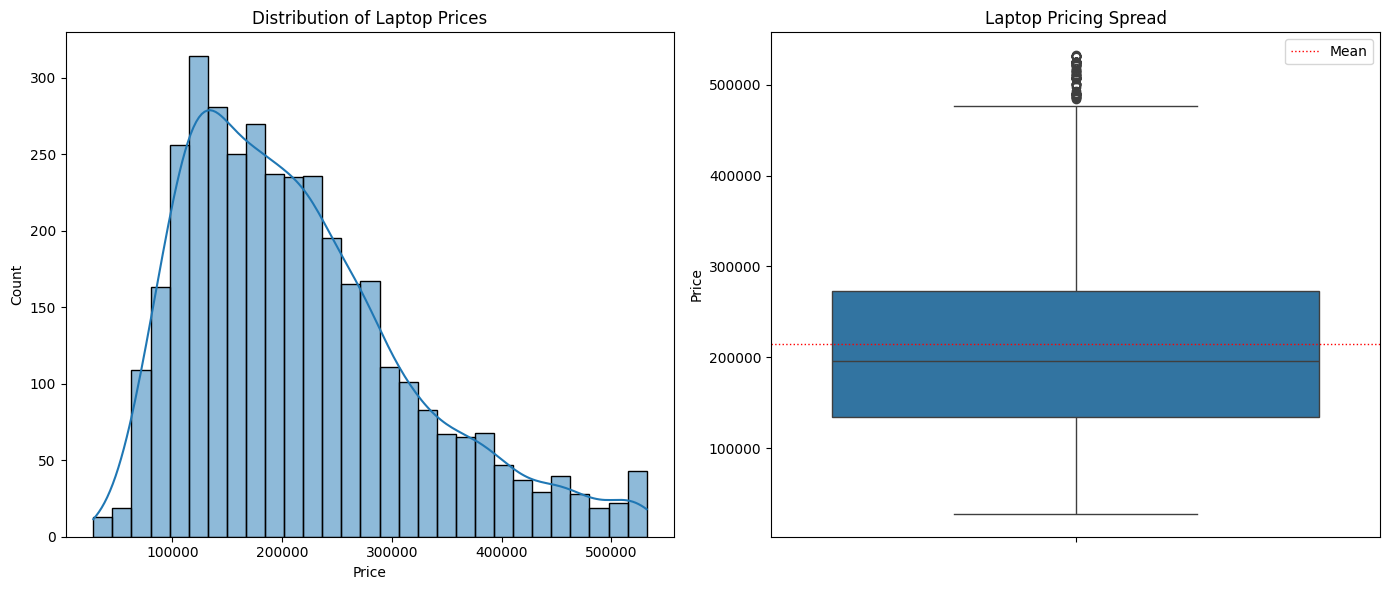

In [32]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mean_price = df['Price'].mean()
sns.histplot(df['Price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Laptop Prices')

sns.boxplot(data=df, y='Price', ax=axes[1])
axes[1].set_title('Laptop Pricing Spread')
axes[1].set_ylabel('Price')

axes[1].axhline(mean_price, color='red', linestyle=':', linewidth=1, label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

In [33]:
price_skew = df['Price'].skew()
print("Skewness of Price:", price_skew)

Skewness of Price: 0.9009862049702472


In [34]:
df['Brand'].value_counts()

Brand
ASUS       889
Lenovo     772
HP         766
Dell       399
Acer       310
MSI        263
Other      189
Samsung     51
Apple       31
Name: count, dtype: int64

In [35]:
df.shape

(3670, 16)

In [36]:
print(df['Brand'].value_counts())

Brand
ASUS       889
Lenovo     772
HP         766
Dell       399
Acer       310
MSI        263
Other      189
Samsung     51
Apple       31
Name: count, dtype: int64


#### Processor Brand

In [37]:
# Filter rows where Processor_Brand is Apple
apple_df = df[df['Processor_Brand'] == 'Apple'][['Processor_Name', 'Processor_Brand']]

# View the resulting DataFrame
print(apple_df)


          Processor_Name Processor_Brand
80              Apple M1           Apple
96    Apple M2 Processor           Apple
227   Apple M2 Processor           Apple
371   Apple M2 Processor           Apple
1557  Apple M1 Processor           Apple
1944  Apple M2 Processor           Apple
1972  Apple M2 Processor           Apple
1980  Apple M2 Processor           Apple
1981  Apple M2 Processor           Apple
1982  Apple M2 Processor           Apple
1983  Apple M2 Processor           Apple


In [38]:
print("Processor_Brand Unique Values:", df['Processor_Brand'].nunique())
print("Missing Processor_Brand values:", df['Processor_Brand'].isna().sum())
df['Processor_Brand'].value_counts()

Processor_Brand Unique Values: 17
Missing Processor_Brand values: 0


Processor_Brand
Intel        2754
AMD           880
Apple          11
MediaTek        4
1.7             4
2.4             2
2.0             2
3.0             2
3.4             2
2.1             2
1.6             1
Qualcomm        1
3.3             1
2.2             1
1.8             1
Microsoft       1
1.9             1
Name: count, dtype: int64

* Some Processors_Brands names have Ghz speeds as a wrong input. So we can remove those values.


In [39]:
# Here only consider Intel and AMD
df['Processor_Brand'].info

<bound method Series.info of 0       MediaTek
1            AMD
2          Intel
3          Intel
4          Intel
          ...   
3971       Intel
3972       Intel
3973         AMD
3974         AMD
3975       Intel
Name: Processor_Brand, Length: 3670, dtype: object>

In [40]:
df.shape

(3670, 16)

In [41]:
valid_processors = ['Intel', 'AMD', 'Apple', 'MediaTek', 'Qualcomm', 'Microsoft']
df = df[df['Processor_Brand'].isin(valid_processors)]

In [42]:
df.shape

(3651, 16)

In [43]:
df['Processor_Brand'].value_counts()

Processor_Brand
Intel        2754
AMD           880
Apple          11
MediaTek        4
Qualcomm        1
Microsoft       1
Name: count, dtype: int64

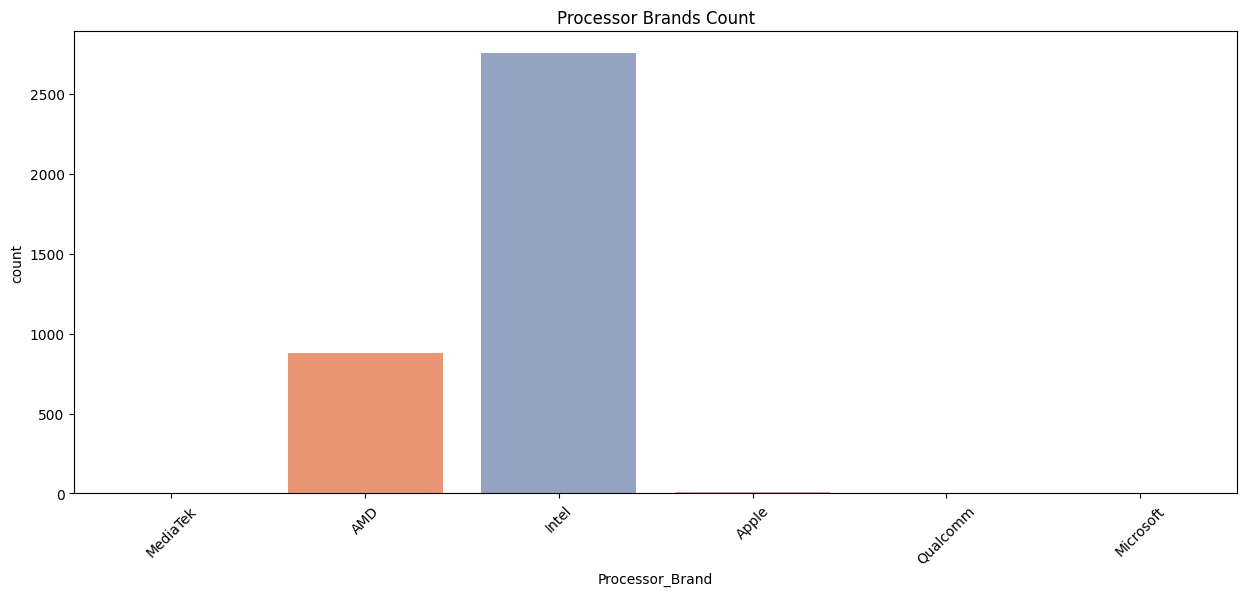

In [44]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Processor_Brand', hue='Processor_Brand', palette='Set2')
plt.xticks(rotation=45)
plt.title("Processor Brands Count")
plt.show()

In [45]:
print(df['Processor_Brand'].value_counts(normalize=True) * 100)

Processor_Brand
Intel        75.431389
AMD          24.102985
Apple         0.301287
MediaTek      0.109559
Qualcomm      0.027390
Microsoft     0.027390
Name: proportion, dtype: float64


* Intel and AMD are the prominant, but apple laptops has special apple chips therefore it also need to be consider. reset can be ignore/drop 

In [46]:
print(df.shape)
top_processor = ['Intel', 'AMD', 'Apple']
df = df[df['Processor_Brand'].isin(top_processor)]
print(df.shape)
df['Processor_Brand'].value_counts()

(3651, 16)
(3645, 16)


Processor_Brand
Intel    2754
AMD       880
Apple      11
Name: count, dtype: int64

In [47]:
pd.set_option('display.max_rows', None)
df['Processor_Name'].value_counts()

Processor_Name
Intel Core i5 (11th Gen)              316
Intel Core i5 (12th Gen)              290
AMD Hexa-Core Ryzen 5                 244
AMD Octa-Core Ryzen 7                 223
Intel Core i3 (11th Gen)              188
Intel Core i5 (10th Gen)              173
Intel Core i5 (8th Gen)               169
Intel Core i3 (10th Gen)              152
Intel Core i7 (12th Gen)              132
Intel Core i5 (13th Gen)              131
Intel Core i7 (13th Gen)              112
AMD Quad-Core Ryzen 5                 108
Intel Celeron Dual-Core               103
Intel Core i3 (12th Gen)               90
Intel Core i7 (11th Gen)               76
Intel Core i3 (7th Gen)                72
AMD Dual-Core Ryzen 3                  67
Intel Core i3 (6th Gen)                62
Intel Core i5 (7th Gen)                60
Intel Core i7 (8th Gen)                58
Intel Core i7 (10th Gen)               48
AMD Quad-Core Ryzen 3                  46
Intel Pentium Quad-Core                43
Intel Core i5 (11th

In [48]:
import re

def categorize_processor(row):
    name = row['Processor_Name']
    brand = row['Processor_Brand']
    
    if brand == 'Intel':
        # Capture i3/i5/i7/i9 or Core Ultra, Core series, etc.
        match = re.search(r'i[3579]', name)
        if match:
            return f"Intel {match.group(0).upper()}"
        elif re.search(r'Ultra\s*5', name, re.I):
            return "Intel Ultra 5"
        elif re.search(r'Ultra\s*7', name, re.I):
            return "Intel Ultra 7"
        elif re.search(r'Ultra\s*9', name, re.I):
            return "Intel Ultra 9"
        elif re.search(r'Pentium', name, re.I):
            return "Intel Pentium"
        elif re.search(r'Celeron', name, re.I):
            return "Intel Celeron"
        else:
            return "Intel Other"
    
    elif brand == 'AMD':
        # Ryzen families or Athlon/A-series
        match = re.search(r'Ryzen\s*[3579]', name, re.I)
        if match:
            return f"AMD {match.group(0).title()}"
        elif re.search(r'Athlon', name, re.I):
            return "AMD Athlon"
        elif re.search(r'A\d', name, re.I):
            # e.g., A6, A8, A10, A12
            a_match = re.search(r'A\d+', name, re.I)
            return f"AMD {a_match.group(0).upper()}"
        else:
            return "AMD Other"
    
    elif brand == 'Apple':
        # All M-series grouped together
        return "Apple M-series"
    
    else:
        return "Other"

# Apply to DataFrame
df['Processor_Category'] = df.apply(categorize_processor, axis=1)

# Quick look at the result
print(df['Processor_Category'].value_counts())


Processor_Category
Intel I5          1267
Intel I3           678
Intel I7           526
AMD Ryzen 5        371
AMD Ryzen 7        251
AMD Ryzen 3        118
Intel Celeron      112
Intel Pentium       58
Intel Other         37
AMD Athlon          35
AMD Ryzen 9         25
Intel Ultra 7       24
Intel I9            24
Intel Ultra 5       23
AMD A6              23
AMD A9              21
AMD Other           18
Apple M-series      11
AMD A8               7
AMD A4               6
Intel Ultra 9        5
AMD A12              3
AMD A10              2
Name: count, dtype: int64


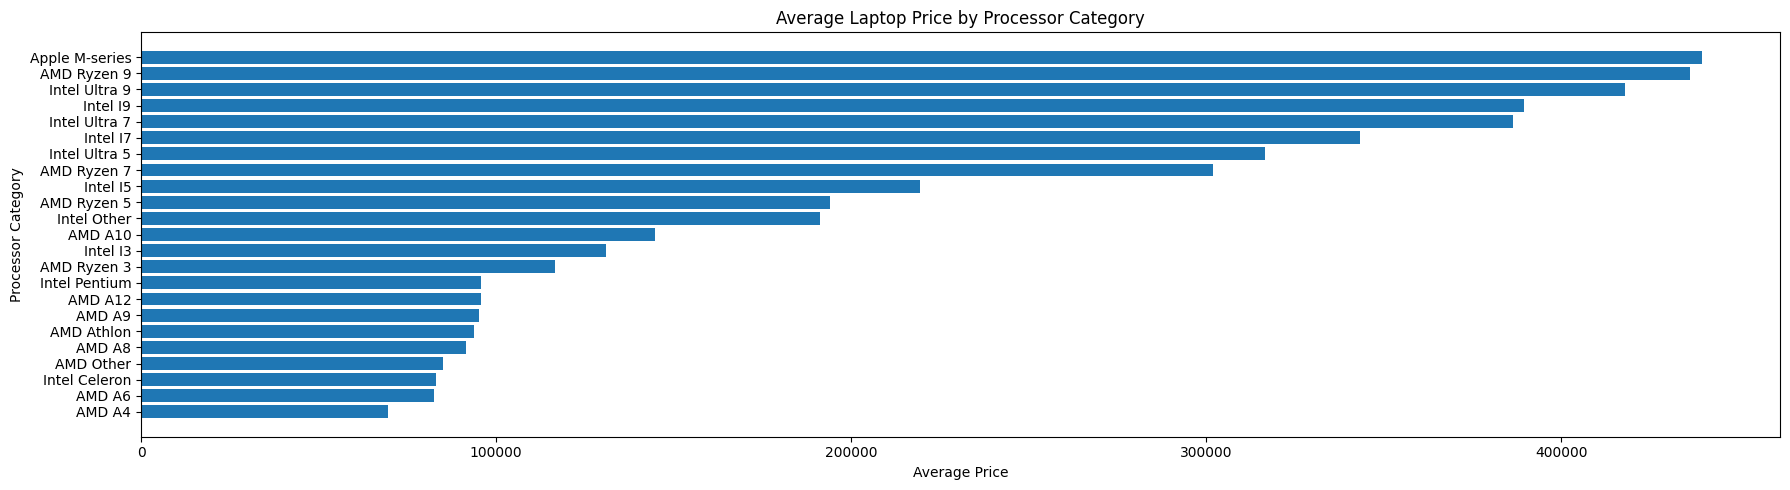

In [49]:
avg_price = df.groupby('Processor_Category')['Price'].mean().sort_values()

plt.figure(figsize=(18,5))
plt.barh(avg_price.index, avg_price.values)   # horizontal bar chart
plt.xlabel("Average Price")
plt.ylabel("Processor Category")
plt.title("Average Laptop Price by Processor Category")
plt.tight_layout()
plt.show()

- Map every Intel, AMD processor in to high/mid/low-end 

In [50]:
def map_segment(row):
    brand = row['Processor_Brand']
    cat   = row['Processor_Category']

    if brand == 'Intel':
        if cat in ['Intel I9', 'Intel I7', 'Intel Ultra 9']:
            return 'High-End'
        elif cat in ['Intel I5', 'Intel Ultra 7', 'Intel Ultra 5']:
            return 'Mid-End'
        elif cat in ['Intel I3', 'Intel Celeron', 'Intel Pentium', 'Intel Other']:
            return 'Low-End'

    elif brand == 'AMD':
        if cat in ['AMD Ryzen 9', 'AMD Ryzen 7']:
            return 'High-End'
        elif cat in ['AMD Ryzen 5']:
            return 'Mid-End'
        elif cat in [
            'AMD Ryzen 3', 'AMD Athlon', 'AMD A12', 'AMD A10',
            'AMD A9', 'AMD A8', 'AMD A6', 'AMD A4', 'AMD Other'
        ]:
            return 'Low-End'

    elif brand == 'Apple':
        return 'Apple M-series'   # keep as-is

    return 'Other'  # fallback if something unexpected appears

In [51]:
df['Processor_Tier'] = df.apply(map_segment, axis=1)
print(df['Processor_Tier'].value_counts())

Processor_Tier
Mid-End           1685
Low-End           1118
High-End           831
Apple M-series      11
Name: count, dtype: int64


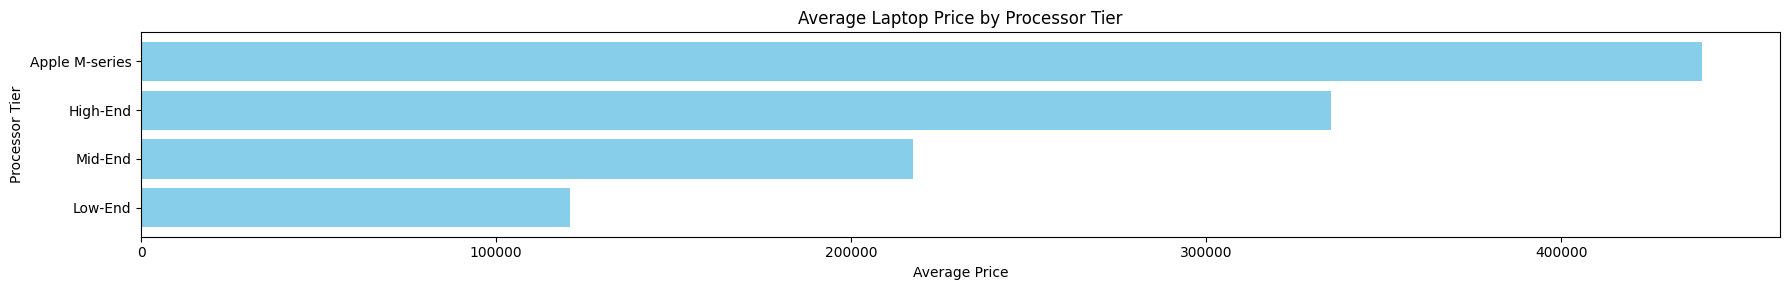

In [52]:
# Calculate mean price by Processor_Tier
avg_price_tier = df.groupby('Processor_Tier')['Price'].mean().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(18,3))
plt.barh(avg_price_tier.index, avg_price_tier.values, color='skyblue')
plt.xlabel("Average Price")
plt.ylabel("Processor Tier")
plt.title("Average Laptop Price by Processor Tier")
plt.tight_layout()
plt.show()


In [53]:
df.head(5)

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,Processor_Category,Processor_Tier
1,Lenovo,127011.5,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life,AMD Ryzen 5,Mid-End
2,Dell,274750.0,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life,Intel I5,Mid-End
3,HP,194215.0,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life,Intel I5,Mid-End
4,Other,76965.0,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life,Intel I3,Low-End
5,Acer,122465.0,Intel Core i5 (11th Gen) Processor,Intel,32 GB Expandable,16 GB,DDR4 RAM,0,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45,45W Adapter,Intel I5,Mid-End


#### RAM

In [54]:
print("RAM Unique Values:", df['RAM'].nunique())
print("Missing RAM values:", df['RAM'].isna().sum())
df['RAM'].value_counts()

RAM Unique Values: 16
Missing RAM values: 0


RAM
8 GB          1597
16 GB          971
4 GB           534
16 GB LP       253
8 GB LP        174
4 GB LP         33
2 GB            22
32 GB LP        21
8 GB RAM        13
16 GB RAM       10
32 GB            7
12 GB            4
16 GB RAM        2
3 GB             2
24 GB            1
6 GB             1
Name: count, dtype: int64

- Clean RAM to get the capacity value

In [55]:
df['RAM'] = df['RAM'].str.replace('RAM', '', regex=False)
df['RAM'] = df['RAM'].str.replace('LP', '', regex=False)
df['RAM'] = df['RAM'].str.replace('GB', '', regex=False)
df['RAM'] = df['RAM'].str.strip().astype(int)

In [56]:
df['RAM'].value_counts()

RAM
8     1784
16    1236
4      567
32      28
2       22
12       4
3        2
24       1
6        1
Name: count, dtype: int64

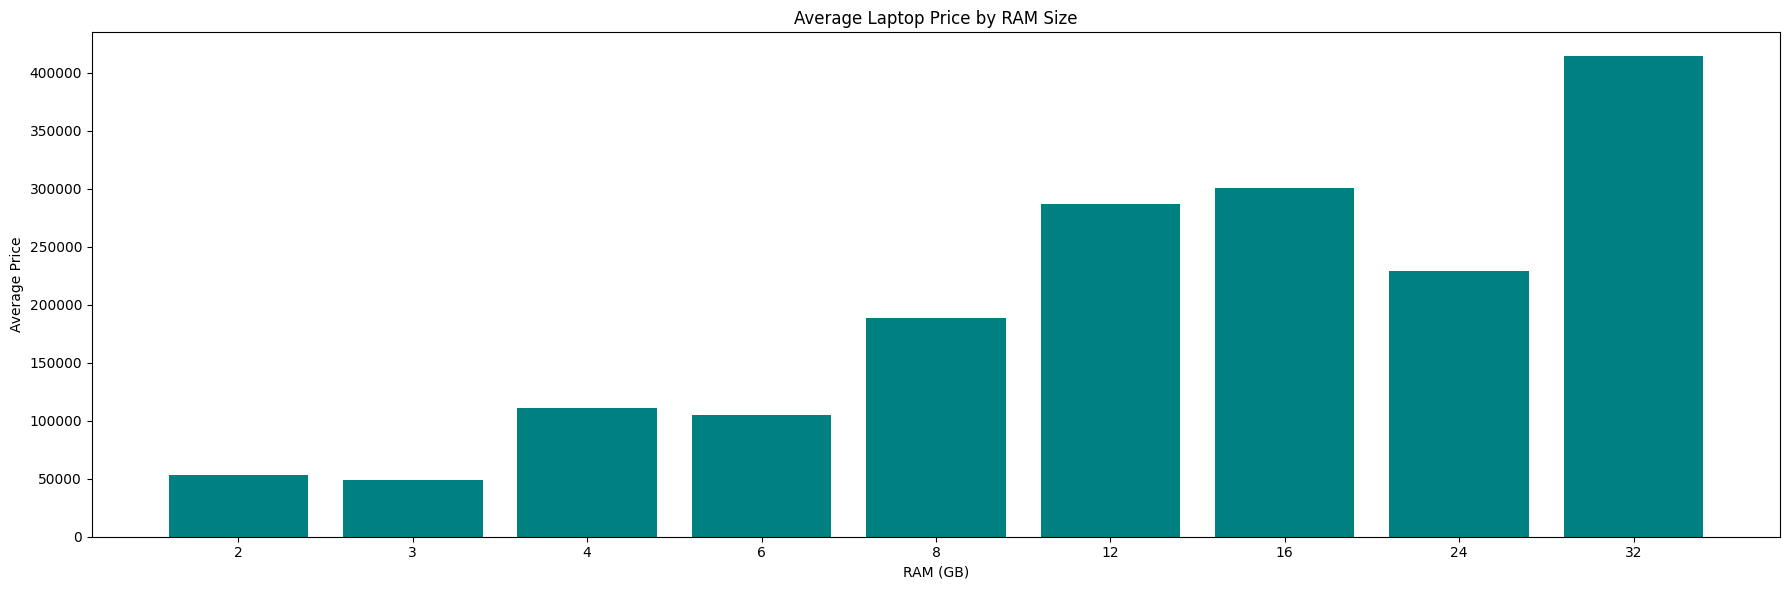

In [57]:
avg_price_ram = df.groupby('RAM')['Price'].mean().sort_index()

# Plot
plt.figure(figsize=(18,6))
plt.bar(avg_price_ram.index.astype(str), avg_price_ram.values, color='teal')
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price")
plt.title("Average Laptop Price by RAM Size")
plt.tight_layout()
plt.show()

In [58]:
# Here i map ram in to nearest standard sizes
ram_map = {
    2: 4,    # 2 GB → 4 GB
    3: 4,    # 3 GB → 4 GB
    6: 8,    # 6 GB → 8 GB 
    12: 16,  # 12 GB → 16 GB
    24: 32   # 24 GB → 32 GB
}
df['RAM'] = df['RAM'].replace(ram_map)


In [59]:
# standard_ram_sizes = [4, 8, 16, 32]
# df = df[df['RAM'].isin(standard_ram_sizes)]
# df.shape

In [60]:
df['RAM'].value_counts()

RAM
8     1785
16    1240
4      591
32      29
Name: count, dtype: int64

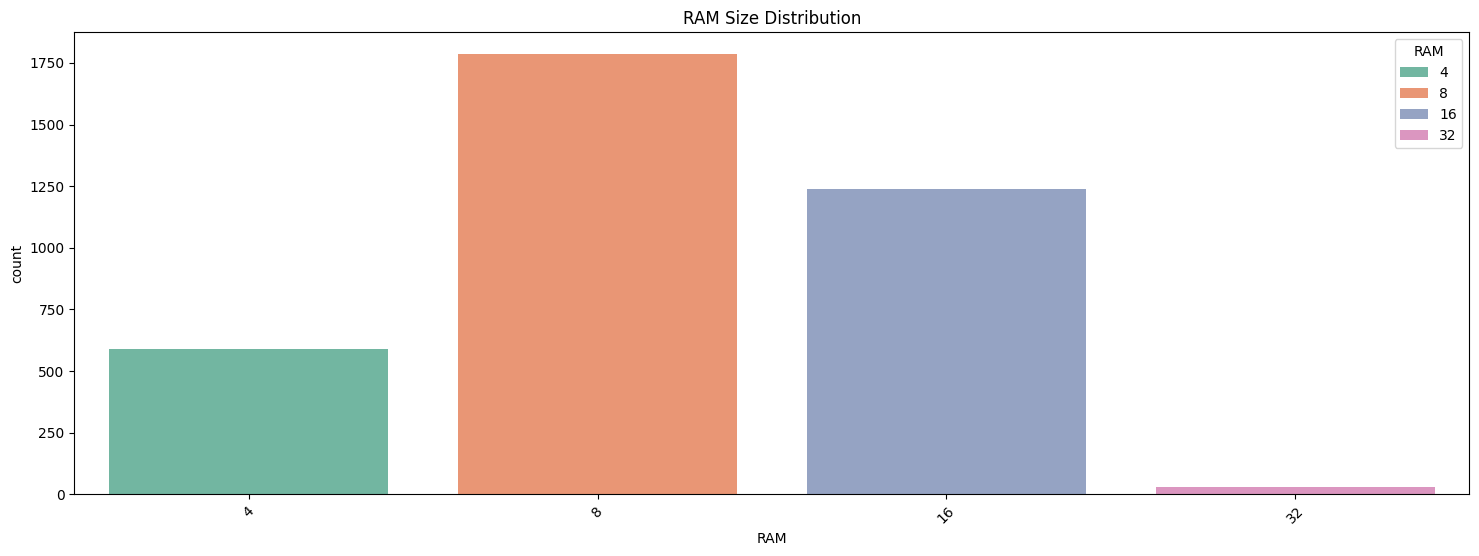

In [61]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='RAM', hue='RAM', palette='Set2')
plt.xticks(rotation=45)
plt.title("RAM Size Distribution")
plt.show()

In [62]:
df['Brand'].value_counts()

Brand
ASUS       885
Lenovo     769
HP         751
Dell       399
Acer       310
MSI        263
Other      188
Samsung     50
Apple       30
Name: count, dtype: int64

#### RAM Type and Processor Speed(Ghz)

In [63]:
print("RAM_TYPE Unique Values:", df['RAM_TYPE'].nunique())
print("Missing RAM_TYPE values:", df['RAM_TYPE'].isna().sum())
df['RAM_TYPE'].value_counts()

RAM_TYPE Unique Values: 19
Missing RAM_TYPE values: 0


RAM_TYPE
DDR4 RAM        1455
DDR4 RAM        1276
DDR5 RAM         173
LPDDR5 RAM       120
LPDDR4X RAM      118
DDR5 RAM          91
LPDDR5 RAM        88
DDR3 RAM          83
DDR3 RAM          60
LPDDR3 RAM        43
LPDDR4X RAM       31
LPDDR5X RAM       28
LPDDR4 RAM        25
RAM               23
LPDDR5X RAM       20
LPDDR4 RAM         6
RAM                2
LPDDR3 RAM         2
DDR2 RAM           1
Name: count, dtype: int64

In [64]:
df['Ghz'].value_counts().head(10)

Ghz
 4.2 Ghz Processor    330
 2.4 Ghz Processor    244
 1.6 Ghz Processor    225
 4.7 Ghz Processor    213
 3.3 Ghz Processor    194
0                     188
 2.3 Ghz Processor    188
 2.1 Ghz Processor    175
 2.6 Ghz Processor    161
 2.0 Ghz Processor    157
Name: count, dtype: int64

- Cleaning RAM-TYPE column 

In [65]:

df['RAM_TYPE'] = (
    df['RAM_TYPE']
    .astype(str)
    .str.upper()                             
    .str.replace(r'\s+', ' ', regex=True)    
    .str.strip()                            
)

df['RAM_TYPE'] = df['RAM_TYPE'].replace({
    'DDR4 RAM': 'DDR4',
    'LPDDR4 RAM': 'DDR4',
    'LPDDR4X RAM': 'DDR4',

    'DDR5 RAM': 'DDR5',
    'LPDDR5 RAM': 'DDR5',
    'LPDDR5X RAM': 'DDR5',

    'DDR3 RAM': 'DDR3',
    'LPDDR3 RAM': 'DDR3',

    'DDR2 RAM': 'DDR2'
})

df = df[df['RAM_TYPE'] != 'DDR2']

In [66]:
df['RAM_TYPE'].value_counts()

RAM_TYPE
DDR4    2911
DDR5     520
DDR3     188
RAM       25
Name: count, dtype: int64

- Cleaning Ghz column 

In [67]:
# Remove everything except the number at the start
df['Ghz'] = (
    df['Ghz']
      .astype(str)                                   # ensure string
      .str.extract(r'([\d\.]+)')                     # capture digits & decimal point
      .astype(float)                                  # convert to float
)

In [68]:
df['Ghz'].value_counts().head()

Ghz
4.2    330
2.4    244
1.6    225
4.7    213
3.3    194
Name: count, dtype: int64

In [69]:
df.shape

(3644, 18)

- Filling unkonwn values for Apple Ghz and RAM_TYPE ( Here manually fill not use any statistical method because of less data)
- Here consider Apple seperately due to specific chips its has and dataset is rare

In [70]:
df[(df['Brand'] == 'Apple') & (df['Brand'] == 'Apple')][['Ghz', 'RAM_TYPE', 'Processor_Name','Processor_Tier']].head(10)

,Ghz,RAM_TYPE,Processor_Name,Processor_Tier
80,2.9,DDR4,Apple M1,Apple M-series
82,1.8,DDR3,Intel Core i5 (5th Gen),Mid-End
96,0.0,RAM,Apple M2 Processor,Apple M-series
227,0.0,DDR5,Apple M2 Processor,Apple M-series
371,0.0,RAM,Apple M2 Processor,Apple M-series
1349,1.6,DDR3,Intel Core i5 (8th Gen),Mid-End
1355,1.6,DDR3,Intel Core i5 (8th Gen),Mid-End
1356,1.6,DDR3,Intel Core i5 (8th Gen),Mid-End
1358,1.6,DDR3,Intel Core i5 (8th Gen),Mid-End
1424,1.1,DDR3,Intel Core M3 (7th Gen),Low-End


In [71]:
# Apple M2 rows: set Ghz=3.49 and RAM_TYPE='LPDDR5 RAM'
df.loc[
    (df['Brand'] == 'Apple') &
    (df['Processor_Brand'] == 'Apple') &
    ((df['Ghz'] == 0.0) | (df['RAM_TYPE'] == 'RAM')) &
    df['Processor_Name'].str.contains('M2', na=False),
    ['Ghz', 'RAM_TYPE']
] = [3.49, 'DDR5'] # Values inserted manually by search in web

# Apple M1 rows: set Ghz=2.9 and RAM_TYPE='DDR4 RAM'
df.loc[
    (df['Brand'] == 'Apple') &
    (df['Processor_Brand'] == 'Apple') &
    ((df['Ghz'] == 0.0) | (df['RAM_TYPE'] == 'RAM')) &
    df['Processor_Name'].str.contains('M1', na=False),
    ['Ghz', 'RAM_TYPE']
] = [2.9, 'DDR4']

# Apple Intel Core i3 empty Ghz replaced with real value 1.1 Ghz
df.loc[
    (df['Brand'] == 'Apple') &
    (df['Processor_Brand'] == 'Intel') &
    ((df['Ghz'] == 0.0) | (df['RAM_TYPE'] == 'RAM')) &
    df['Processor_Name'].str.contains('Intel Core i3', na=False),
    ['Ghz', 'RAM_TYPE']
] = [1.1, 'DDR4']


In [72]:
df[(df['Brand'] == 'Apple') & (df['Brand'] == 'Apple')][['Ghz', 'RAM_TYPE', 'Processor_Name']].head(10)

,Ghz,RAM_TYPE,Processor_Name
80,2.90,DDR4,Apple M1
82,1.80,DDR3,Intel Core i5 (5th Gen)
96,3.49,DDR5,Apple M2 Processor
227,3.49,DDR5,Apple M2 Processor
371,3.49,DDR5,Apple M2 Processor
1349,1.60,DDR3,Intel Core i5 (8th Gen)
1355,1.60,DDR3,Intel Core i5 (8th Gen)
1356,1.60,DDR3,Intel Core i5 (8th Gen)
1358,1.60,DDR3,Intel Core i5 (8th Gen)
1424,1.10,DDR3,Intel Core M3 (7th Gen)


* Filling unknown Processor speed and RAM for Intel or AMD by existing data

In [73]:
df[(df['RAM_TYPE'] == 'RAM') | (df['Ghz'] == 0.0)].shape

(194, 18)

1. Filling RAM

Here Select most frequent RAM-Type by processor tier (High/Mid/Low-End)

In [74]:
most_freq_ram = (
    df[df['RAM_TYPE'] != 'RAM']  # exclude placeholder 'RAM'
      .groupby(['Processor_Brand', 'Processor_Tier'])['RAM_TYPE']
      .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
      .reset_index()
      .rename(columns={'RAM_TYPE': 'Most_Freq_RAM'})
)

#Merge back to the original dataframe
df = df.merge(most_freq_ram, on=['Processor_Brand', 'Processor_Tier'], how='left')

#Replace 'RAM' with the most frequent RAM_TYPE
df['RAM_TYPE'] = df.apply(
    lambda row: row['Most_Freq_RAM'] if row['RAM_TYPE'] == 'RAM' else row['RAM_TYPE'],
    axis=1
)

df = df.drop(columns=['Most_Freq_RAM'])

df['RAM_TYPE'].value_counts()

RAM_TYPE
DDR4    2929
DDR5     527
DDR3     188
Name: count, dtype: int64

Filling Ghz

In [75]:
mean_ghz = (
    df[df['Ghz'] != 0.0]                       # exclude zeros from mean calc
      .groupby(['Processor_Brand', 'Processor_Tier'])['Ghz']
      .mean()
      .reset_index()
      .rename(columns={'Ghz': 'Mean_Ghz'})
)

#Merge the mean values back to df
df = df.merge(mean_ghz, on=['Processor_Brand', 'Processor_Tier'], how='left')

#Replace 0.0 with the corresponding mean
df['Ghz'] = df.apply(
    lambda row: row['Mean_Ghz'] if row['Processor_Brand'] in ['Intel','AMD'] 
                and row['Ghz'] == 0.0 else row['Ghz'],
    axis=1
)

df = df.drop(columns=['Mean_Ghz'])

print(df['Ghz'].value_counts().head())

Ghz
4.2    330
2.4    244
1.6    225
4.7    213
3.3    194
Name: count, dtype: int64


- Rounding Ghz to nearest 0.5 GHz

In [76]:
df['Processor_Speed(Ghz)'] = (df['Ghz'] * 2).round() / 2

In [77]:
df['Processor_Speed(Ghz)'].value_counts()

Processor_Speed(Ghz)
2.5    866
2.0    555
4.0    430
1.5    388
3.0    386
1.0    351
3.5    337
4.5    213
5.0    112
5.5      6
Name: count, dtype: int64

In [78]:
df.shape

(3644, 19)

- Extract the digit (3,4,5) from DDR string and convert to int

In [79]:
import re

# Extract the number after 'DDR' as an integer
df['RAM_TYPE'] = df['RAM_TYPE'].str.extract(r'(\d+)').astype('Int64')
df = df.rename(columns={'RAM_TYPE': 'RAM_TYPE(DDR)'})
df['RAM_TYPE(DDR)'].value_counts()


RAM_TYPE(DDR)
4    2929
5     527
3     188
Name: count, dtype: Int64

#### RAM Expandability

In [80]:
df['RAM_Expandable'].value_counts()

RAM_Expandable
Not Expandable       1986
 16 GB Expandable     735
 32 GB Expandable     466
 8 GB Expandable      179
 12 GB Expandable     154
 64 GB Expandable     105
 4 GB Expandable        8
 48 GB Expandable       8
 2 GB Expandable        2
 10 GB Expandable       1
Name: count, dtype: int64

In [81]:
# Convert RAM_Expandable to Yes/No
df['RAM_Expandable'] = df['RAM_Expandable'].apply(lambda x: 'No' if 'Not' in x else 'Yes')
df['RAM_Expandable'].value_counts()

RAM_Expandable
No     1986
Yes    1658
Name: count, dtype: int64

In [82]:
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE(DDR),Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,Processor_Category,Processor_Tier,Processor_Speed(Ghz)
0,Lenovo,127011.5,AMD Hexa-Core Ryzen 5,AMD,Yes,8,4,4.000000,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life,AMD Ryzen 5,Mid-End,4.0
1,Dell,274750.0,Intel Core i5 (12th Gen),Intel,Yes,16,5,3.300000,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life,Intel I5,Mid-End,3.5
2,HP,194215.0,Intel Core i5 (12th Gen),Intel,Yes,8,4,4.200000,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life,Intel I5,Mid-End,4.0
3,Other,76965.0,Intel Core i3 (11th Gen),Intel,No,8,4,1.700000,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life,Intel I3,Low-End,1.5
4,Acer,122465.0,Intel Core i5 (11th Gen) Processor,Intel,Yes,16,4,2.676316,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45,45W Adapter,Intel I5,Mid-End,2.5


#### Display Size

In [83]:
df = df.rename(columns={'Display': 'Display_Size'})
df['Display_Size'] = pd.to_numeric(df['Display_Size'], errors='coerce') # Convert to numeric 

In [84]:
def display_category(x):
    if x <= 14.0:
        return 'Small'
    elif x <= 15.6:
        return 'Medium'
    else:
        return 'Large'

df['Display_Tier'] = df['Display_Size'].apply(display_category)
df['Display_Tier'].value_counts()

Display_Tier
Medium    2160
Small     1213
Large      271
Name: count, dtype: int64

#### GPU_Brand

In [85]:
df.dropna(subset=['GPU_Brand'], inplace=True)
df['GPU_Brand'].value_counts(dropna=False)


GPU_Brand
Intel      1859
NVIDIA     1157
AMD         607
Apple        11
Nvidia        7
NIVIDIA       1
ATI           1
Name: count, dtype: int64

In [86]:
# Standardize GPU_Brand names
df['GPU_Brand'] = df['GPU_Brand'].str.upper()  # Convert all to uppercase

# Map only desired brands to proper casing
brand_mapping = {
    'INTEL': 'Intel',
    'NVIDIA': 'NVIDIA',
    'NIVIDIA': 'NVIDIA',
    'AMD': 'AMD',
    'APPLE': 'Apple'
}

df['GPU_Brand'] = df['GPU_Brand'].map(brand_mapping)


# Check the result
df.dropna(subset=['GPU_Brand'], inplace=True)
print(df['GPU_Brand'].value_counts(dropna=False))


GPU_Brand
Intel     1859
NVIDIA    1165
AMD        607
Apple       11
Name: count, dtype: int64


#### GPU

In [87]:
# Drop rows where GPU is NaN
df.dropna(subset=['GPU'], inplace=True)

In [88]:
print("Missing GPU values:", df['GPU'].isna().sum())
df['GPU'].value_counts(dropna=False)


Missing GPU values: 0


GPU
UHD                                         642
Iris Xe                                     545
Radeon                                      313
GeForce RTX 3050 GPU, 4 GB                  196
Integrated                                  147
GeForce GTX 1650 GPU, 4 GB                  143
UHD 620                                     116
GeForce RTX 4050 GPU, 6 GB                   86
HD 620                                       83
GeForce RTX 2050 GPU, 4 GB                   79
GeForce RTX 3060 GPU, 6 GB                   67
Radeon Vega 8                                54
HD 520                                       54
GeForce RTX 4060 GPU, 8 GB                   49
GeForce RTX 3050 Ti GPU, 4 GB                43
Arc                                          39
Geforce GTX 1650 GPU, 4 GB                   36
UHD 600                                      35
GeForce RTX 3050 GPU, 6 GB                   34
GeForce GTX 1050 GPU, 4 GB                   25
Radeon R5                           

In [89]:
print(df['GPU_Brand'].value_counts(dropna=False))

GPU_Brand
Intel     1851
NVIDIA    1165
AMD        607
Apple       11
Name: count, dtype: int64


##### INTEL GPU CLEANING

 - funtion to clean current intel gpu

In [90]:
# Filter Intel GPUs
intel_df = df[df['GPU_Brand'] == 'Intel'].copy()

def standardize_intel_name(gpu_name):
    """Standardize Intel GPU names"""
    if pd.isna(gpu_name):
        return 'Unknown'
    
    gpu = str(gpu_name).strip().upper()
    
    # Remove common prefixes
    gpu = re.sub(r'^(INTEL\s*)?', '', gpu)
    
    # Standardize UHD series
    if 'UHD' in gpu:
        # Extract number if present
        uhd_match = re.search(r'UHD\s*(\d+)?', gpu)
        if uhd_match and uhd_match.group(1):
            return f"UHD {uhd_match.group(1)}"
        else:
            return "UHD Graphics"
    
    # Standardize HD series
    elif re.search(r'HD\s*(\d+)', gpu):
        hd_match = re.search(r'HD\s*(\d+)', gpu)
        return f"HD {hd_match.group(1)}"
    
    # Standardize Iris series
    elif 'IRIS XE' in gpu:
        if 'MAX' in gpu:
            return "Iris Xe Max"  # Discrete version
        else:
            return "Iris Xe"
    elif 'IRIS PLUS' in gpu:
        return "Iris Plus"
    elif 'IRIS PRO' in gpu:
        return "Iris Pro"
    elif 'IRIS' in gpu:
        return "Iris"
    
    # Standardize Arc series (discrete)
    elif 'ARC' in gpu:
        arc_match = re.search(r'ARC\s*([A-Z]?\d+M?)', gpu)
        if arc_match:
            return f"Arc {arc_match.group(1)}"
        else:
            return "Arc"
    
    # Handle integrated variants
    elif 'INTEGRATED' in gpu:
        if 'UHD' in gpu:
            return "UHD Graphics"
        elif 'IRIS' in gpu:
            return "Iris Xe"
        else:
            return "Integrated Graphics"
    
    # Generic graphics
    elif gpu in ['GRAPHICS', 'UMA']:
        return "Integrated Graphics"
    
    return gpu.title()

 - funtion to map in to tiers

In [91]:
def get_intel_tier(gpu_name):
    """Assign performance tier to Intel GPUs"""
    if pd.isna(gpu_name):
        return 'Unknown'
    
    gpu_upper = str(gpu_name).upper()
    
    # Mid-end: Discrete Intel GPUs
    if any(x in gpu_upper for x in ['ARC A530M', 'ARC A370M', 'IRIS XE MAX']):
        return 'Mid-end'
    
    # Low-end: Good integrated graphics
    elif any(x in gpu_upper for x in ['IRIS XE', 'IRIS PLUS', 'IRIS PRO', 'ARC']):
        return 'Low-end'
    
    # Entry-level: Basic integrated graphics
    else:
        return 'Entry-level'

- Apply above functions

In [92]:
# Apply cleaning functions
intel_df['GPU_Standardized'] = intel_df['GPU'].apply(standardize_intel_name)
intel_df['GPU_Tier'] = intel_df['GPU_Standardized'].apply(get_intel_tier)

# Display results
print("\nIntel GPU Tier Distribution:")
print(intel_df['GPU_Tier'].value_counts())

for col in ['GPU_Standardized','GPU_Tier']:
    df.loc[df['GPU_Brand']=='Intel', col] = intel_df[col].values


Intel GPU Tier Distribution:
GPU_Tier
Entry-level    1231
Low-end         617
Mid-end           3
Name: count, dtype: int64


##### AMD GPU CLEANING

 - funtion to clean amd gpu

In [93]:
# Filter AMD GPUs
amd_df = df[df['GPU_Brand'] == 'AMD'].copy()

def standardize_amd_name(gpu_name):
    """Standardize AMD GPU names"""
    if pd.isna(gpu_name):
        return 'Unknown'
    
    gpu = str(gpu_name).strip()
    
    # Remove Radeon prefix for consistency
    gpu = re.sub(r'^Radeon\s+', '', gpu, flags=re.IGNORECASE)
    
    # Standardize RX series (discrete)
    if re.search(r'RX\s*(\d+[MS]?)', gpu, re.IGNORECASE):
        rx_match = re.search(r'RX\s*(\d+[MS]?)', gpu, re.IGNORECASE)
        return f"RX {rx_match.group(1)}"
    
    # Standardize Vega series (APU integrated)
    elif re.search(r'Vega\s*(\d+)', gpu, re.IGNORECASE):
        vega_match = re.search(r'Vega\s*(\d+)', gpu, re.IGNORECASE)
        return f"Vega {vega_match.group(1)}"
    
    # Standardize R-series (older discrete)
    elif re.search(r'R([2-7])\s*(M?\d*)', gpu, re.IGNORECASE):
        r_match = re.search(r'R([2-7])\s*(M?\d*)', gpu, re.IGNORECASE)
        if r_match.group(2):
            return f"R{r_match.group(1)} {r_match.group(2)}"
        else:
            return f"R{r_match.group(1)}"
    
    # Standardize mobile APU graphics
    elif re.search(r'(\d{3})M', gpu):
        mobile_match = re.search(r'(\d{3})M', gpu)
        return f"{mobile_match.group(1)}M"
    
    # Standardize HD series (older discrete)
    elif re.search(r'HD\s*(\d+)', gpu, re.IGNORECASE):
        hd_match = re.search(r'HD\s*(\d+)', gpu, re.IGNORECASE)
        return f"HD {hd_match.group(1)}"
    
    # Handle generic cases
    elif gpu.upper() in ['RADEON', 'INTEGRATED']:
        return 'Radeon Graphics'
    elif 'GRAPHICS' in gpu.upper():
        return 'Radeon Graphics'
    
    return gpu.title()

 - funtion to get tier

In [94]:
def get_amd_tier(gpu_name):
    """Assign performance tier to AMD GPUs"""
    if pd.isna(gpu_name):
        return 'Unknown'
    
    gpu_upper = str(gpu_name).upper()
    
    # High-end: High-performance discrete GPUs
    if any(x in gpu_upper for x in ['RX 6800', 'RX 6700', 'RX 7600']):
        return 'High-end'
    
    # Mid-end: Mid-performance discrete GPUs
    elif any(x in gpu_upper for x in ['RX 6600', 'RX 6550', 'RX 6500', 'RX 580', 'RX 560', 'RX 5600', 'RX 5500']):
        return 'Mid-end'
    elif any(x in gpu_upper for x in ['R5 M', 'R7 M', 'HD 8']):
        return 'Mid-end'
    
    # Low-end: APU integrated graphics (decent)
    elif any(x in gpu_upper for x in ['VEGA', '780M', '760M', '680M', '610M']):
        return 'Low-end'
    elif any(x in gpu_upper for x in ['530', '535', '520']):
        return 'Low-end'
    
    # Entry-level: Basic integrated
    else:
        return 'Entry-level'


 - Apply above functions

In [95]:
# Apply cleaning functions
amd_df['GPU_Standardized'] = amd_df['GPU'].apply(standardize_amd_name)
amd_df['GPU_Tier'] = amd_df['GPU_Standardized'].apply(get_amd_tier)

# Display results
print("\nAMD GPU Tier Distribution:")
print(amd_df['GPU_Tier'].value_counts())

for col in ['GPU_Standardized','GPU_Tier']:
    df.loc[df['GPU_Brand']=='AMD', col] = amd_df[col].values


AMD GPU Tier Distribution:
GPU_Tier
Entry-level    416
Low-end        144
Mid-end         40
High-end         7
Name: count, dtype: int64


##### NVIDIA GPU CLEANING

- funtion to clean Nvidia gpu

In [96]:
# Filter NVIDIA GPUs
nvidia_df = df[df['GPU_Brand'] == 'NVIDIA'].copy()

def standardize_nvidia_name(gpu_name):
    """Standardize NVIDIA GPU names"""
    if pd.isna(gpu_name):
        return 'Unknown'
    
    gpu = str(gpu_name).strip()
    
    # Remove GeForce prefix for consistency
    gpu = re.sub(r'^GeForce\s+', '', gpu, flags=re.IGNORECASE)
    gpu = re.sub(r'^GEFORCE\s+', '', gpu, flags=re.IGNORECASE)
    gpu = re.sub(r'^Geforce\s+', '', gpu, flags=re.IGNORECASE)
    
    # Remove GPU suffix and VRAM info
    gpu = re.sub(r'\s*GPU,?\s*\d+\s*GB?', '', gpu, flags=re.IGNORECASE)
    gpu = re.sub(r'\s*GPU\s*$', '', gpu, flags=re.IGNORECASE)
    
    # Standardize RTX series
    if re.search(r'RTX\s*(\d{4})\s*(Ti)?', gpu, re.IGNORECASE):
        rtx_match = re.search(r'RTX\s*(\d{4})\s*(Ti)?', gpu, re.IGNORECASE)
        ti_suffix = ' Ti' if rtx_match.group(2) else ''
        return f"RTX {rtx_match.group(1)}{ti_suffix}"
    
    # Standardize GTX series
    elif re.search(r'GTX\s*(\d{4})\s*(Ti)?', gpu, re.IGNORECASE):
        gtx_match = re.search(r'GTX\s*(\d{4})\s*(Ti)?', gpu, re.IGNORECASE)
        ti_suffix = ' Ti' if gtx_match.group(2) else ''
        return f"GTX {gtx_match.group(1)}{ti_suffix}"
    
    # Standardize MX series
    elif re.search(r'MX\s*(\d{3})', gpu, re.IGNORECASE):
        mx_match = re.search(r'MX\s*(\d{3})', gpu, re.IGNORECASE)
        return f"MX {mx_match.group(1)}"
    
    # Standardize GT series
    elif re.search(r'GT\s*(\d{3}MX)', gpu, re.IGNORECASE):
        gt_match = re.search(r'GT\s*(\d{3}MX)', gpu, re.IGNORECASE)
        return gt_match.group(1)
    
    # Handle Quadro series (professional)
    elif 'QUADRO' in gpu.upper():
        quadro_match = re.search(r'Quadro\s+([A-Z]?\d+)', gpu, re.IGNORECASE)
        if quadro_match:
            return f"Quadro {quadro_match.group(1)}"
        else:
            return "Quadro"
    
    # Clean up Max-Q variants
    gpu = re.sub(r'MAX[\s-]?Q', 'Max-Q', gpu, flags=re.IGNORECASE)
    gpu = re.sub(r'Max Q', 'Max-Q', gpu, flags=re.IGNORECASE)
    
    # Clean up Ti variants
    gpu = re.sub(r'Ti`', 'Ti', gpu)
    gpu = re.sub(r'TI\b', 'Ti', gpu)
    
    return gpu.strip()


- funtion for tier seperation

In [97]:
def get_nvidia_tier(gpu_name):
    """Assign performance tier to NVIDIA GPUs"""
    if pd.isna(gpu_name):
        return 'Unknown'
    
    gpu_upper = str(gpu_name).upper()
    
    # High-end: Flagship gaming and professional GPUs
    high_end_patterns = [
        'RTX 4070', 'RTX 4070 TI', 'RTX 3080', 'RTX 3080 TI', 'RTX 3070', 'RTX 3070 TI',
        'RTX 2080', 'RTX 2080 TI', 'RTX 2070', 'GTX 1080', 'GTX 1070',
        'QUADRO', 'RTX A'
    ]
    if any(pattern in gpu_upper for pattern in high_end_patterns):
        return 'High-end'
    
    # Mid-end: Good gaming performance
    mid_end_patterns = [
        'RTX 4060', 'RTX 4060 TI', 'RTX 4050', 'RTX 4050 TI', 'RTX 3060', 'RTX 3060 TI', 'RTX 3050', 'RTX 3050 TI',
        'RTX 2060', 'RTX 2050', 'GTX 1660', 'GTX 1660 TI', 'GTX 1650', 'GTX 1650 TI',
        'GTX 1060', 'GTX 1050', 'GTX 1050 TI'
    ]
    if any(pattern in gpu_upper for pattern in mid_end_patterns):
        return 'Mid-end'
    
    # Low-end: Entry gaming and productivity
    low_end_patterns = [
        'MX', 'GT 9', 'GT 8', 'GT 7', 'GTX 960M', 'GTX 950M', 'GTX 850M'
    ]
    if any(pattern in gpu_upper for pattern in low_end_patterns):
        return 'Low-end'
    
    # Entry-level: Basic discrete graphics
    return 'Entry-level'

- Apply above functions

In [98]:
# Apply cleaning functions
nvidia_df['GPU_Standardized'] = nvidia_df['GPU'].apply(standardize_nvidia_name)
nvidia_df['GPU_Tier'] = nvidia_df['GPU_Standardized'].apply(get_nvidia_tier)

# Display results
print("\nNVIDIA GPU Tier Distribution:")
print(nvidia_df['GPU_Tier'].value_counts())

for col in ['GPU_Standardized','GPU_Tier']:
    df.loc[df['GPU_Brand']=='NVIDIA', col] = nvidia_df[col].values


NVIDIA GPU Tier Distribution:
GPU_Tier
Mid-end        900
Low-end        215
Entry-level     26
High-end        24
Name: count, dtype: int64


##### APPLE GPU CLEANING

- APPLE GPU CLEANING

In [99]:
# Filter Apple GPUs
apple_df = df[df['GPU_Brand'] == 'Apple'].copy()

def standardize_apple_name(gpu_name):
    """Standardize Apple GPU names"""
    if pd.isna(gpu_name):
        return 'Unknown'
    
    gpu = str(gpu_name).strip().upper()
    
    if 'M2' in gpu:
        return 'M2'
    elif 'M1' in gpu:
        return 'M1'
    else:
        return gpu.title()

def get_apple_tier(gpu_name):
    """All Apple Silicon GPUs are considered high-end for efficiency"""
    return 'High-end'


# Apply cleaning functions
apple_df['GPU_Standardized'] = apple_df['GPU'].apply(standardize_apple_name)
apple_df['GPU_Tier'] = apple_df['GPU_Standardized'].apply(get_apple_tier)

# Display results
print("\nApple GPU Tier Distribution:")
print(apple_df['GPU_Tier'].value_counts())

for col in ['GPU_Standardized','GPU_Tier']:
    df.loc[df['GPU_Brand']=='Apple', col] = apple_df[col].values



Apple GPU Tier Distribution:
GPU_Tier
High-end    11
Name: count, dtype: int64


In [100]:
df.shape

(3634, 22)

#### SSD and HDD

##### SSD

In [101]:
print(df['SSD'].value_counts(dropna=False))

SSD
512 GB SSD Storage     1874
NO SSD                  644
1024 GB SSD Storage     389
256 GB SSD Storage      347
256 GB SSD Storage      198
128 GB SSD Storage       56
128 GB SSD Storage       44
32 GB SSD Storage        25
64 GB SSD Storage        21
512 GB SSD Storage       12
16 GB SSD Storage        12
8 GB SSD Storage          4
512  SSD Storage          2
256  SSD Storage          2
16 GB SSD Storage         2
1 GB SSD Storage          1
32 GB SSD Storage         1
Name: count, dtype: int64


- Cleaning Inconsistent names

In [102]:
def clean_ssd(ssd):
    if pd.isna(ssd) or 'NO' in str(ssd).upper():
        return 'No SSD'
    
    # Remove extra spaces
    ssd = str(ssd).strip()
    
    # Extract numeric value (size)
    match = re.search(r'(\d+)', ssd)
    if match:
        size = match.group(1)
        return f"{size} GB SSD"
    else:
        return 'Unknown'

# Apply the cleaning function
df['SSD'] = df['SSD'].apply(clean_ssd)

# Check results
print(df['SSD'].value_counts())

SSD
512 GB SSD     1888
No SSD          644
256 GB SSD      547
1024 GB SSD     389
128 GB SSD      100
32 GB SSD        26
64 GB SSD        21
16 GB SSD        14
8 GB SSD          4
1 GB SSD          1
Name: count, dtype: int64


- Convert SSD capacities to numbers to int

In [103]:
def ssd_to_number(ssd):
    if pd.isna(ssd) or 'NO' in str(ssd).upper():
        return 0
    # Extract the first number found in the string
    match = re.search(r'(\d+)', str(ssd))
    if match:
        return int(match.group(1))
    else:
        return 0

# Apply the function
df['SSD(GB)'] = df['SSD'].apply(ssd_to_number)
print(df['SSD(GB)'].value_counts())

SSD(GB)
512     1888
0        644
256      547
1024     389
128      100
32        26
64        21
16        14
8          4
1          1
Name: count, dtype: int64


- Keep only dominat capacities

In [104]:
# Define main sizes and include 0 for No SSD
keep_sizes = [0, 128, 256, 512, 1024]

# Keep only these values
df = df[df['SSD(GB)'].isin(keep_sizes)]

# Check results
print(df['SSD(GB)'].value_counts())

SSD(GB)
512     1888
0        644
256      547
1024     389
128      100
Name: count, dtype: int64


In [105]:
df.shape

(3568, 23)

##### HDD

In [106]:
print(df['HDD'].value_counts(dropna=False))

HDD
No HDD                  2656
1024 GB HDD Storage      587
 1024 GB HDD Storage     267
500 GB HDD Storage        38
2048 GB HDD Storage       18
 2048 GB HDD Storage       1
1 GB HDD Storage           1
Name: count, dtype: int64


-  Clean HDD naming inconsitencies

In [107]:
def clean_hdd(hdd):
    if pd.isna(hdd) or 'NO' in str(hdd).upper():
        return 'No HDD'
    
    # Remove extra spaces
    hdd = str(hdd).strip()
    
    # Extract numeric value (size)
    match = re.search(r'(\d+)', hdd)
    if match:
        size = match.group(1)
        return f"{size} GB HDD"
    else:
        return 'Unknown'

# Apply the cleaning function
df['HDD'] = df['HDD'].apply(clean_hdd)
print(df['HDD'].value_counts(dropna=False))

HDD
No HDD         2656
1024 GB HDD     854
500 GB HDD       38
2048 GB HDD      19
1 GB HDD          1
Name: count, dtype: int64


- Convert to int

In [108]:
def hdd_to_number(hdd):
    if pd.isna(hdd) or 'NO' in str(hdd).upper():
        return 0
    
    # Remove extra spaces
    hdd = str(hdd).strip()
    
    # Extract the first number (size in GB)
    match = re.search(r'(\d+)', hdd)
    if match:
        return int(match.group(1))
    else:
        return 0

# Apply the function
df['HDD(GB)'] = df['HDD'].apply(hdd_to_number)

# Check results
print(df['HDD(GB)'].value_counts(dropna=False))

HDD(GB)
0       2656
1024     854
500       38
2048      19
1          1
Name: count, dtype: int64


- Keep only dominat capacities

In [109]:
keep_hdd = [0, 500, 1024]

# Keep only these values
df = df[df['HDD(GB)'].isin(keep_hdd)]

# Check results
print(df['HDD(GB)'].value_counts())

HDD(GB)
0       2656
1024     854
500       38
Name: count, dtype: int64


In [110]:
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE(DDR),Ghz,Display_type,Display_Size,...,Adapter,Battery_Life,Processor_Category,Processor_Tier,Processor_Speed(Ghz),Display_Tier,GPU_Standardized,GPU_Tier,SSD(GB),HDD(GB)
0,Lenovo,127011.5,AMD Hexa-Core Ryzen 5,AMD,Yes,8,4,4.000000,LCD,15.6,...,65,Upto 11 Hrs Battery Life,AMD Ryzen 5,Mid-End,4.0,Medium,Radeon Graphics,Entry-level,512,0
1,Dell,274750.0,Intel Core i5 (12th Gen),Intel,Yes,16,5,3.300000,LCD,15.6,...,56,Upto 10 Hrs Battery Life,Intel I5,Mid-End,3.5,Medium,RTX 3050,Mid-end,512,0
2,HP,194215.0,Intel Core i5 (12th Gen),Intel,Yes,8,4,4.200000,LCD,15.6,...,no,Upto 7.30 Hrs Battery Life,Intel I5,Mid-End,4.0,Medium,Iris Xe,Low-end,512,0
3,Other,76965.0,Intel Core i3 (11th Gen),Intel,No,8,4,1.700000,LCD,15.6,...,45,Upto 8 Hrs Battery Life,Intel I3,Low-End,1.5,Medium,UHD Graphics,Entry-level,512,0
4,Acer,122465.0,Intel Core i5 (11th Gen) Processor,Intel,Yes,16,4,2.676316,LCD,14.0,...,45,45W Adapter,Intel I5,Mid-End,2.5,Small,Iris Xe,Low-end,512,0


#### Battery_Life and Adapter Not considered

- Battery_Life consist of lot of missing values and mixed with Adapter watt values. Therefore not considered

#### Final Cleaned Dataset

- Drop unnessary columns

In [111]:
cols_to_drop = [
    'Processor_Name', 'Display_Size', 'Ghz', 'SSD', 'HDD','GPU',
    'Adapter', 'Battery_Life', 'Processor_Category', 'GPU_Standardized'
]
# Drop columns
df = df.drop(columns=cols_to_drop)
# Check the updated DataFrame
df.head()

,Brand,Price,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE(DDR),Display_type,GPU_Brand,Processor_Tier,Processor_Speed(Ghz),Display_Tier,GPU_Tier,SSD(GB),HDD(GB)
0,Lenovo,127011.5,AMD,Yes,8,4,LCD,AMD,Mid-End,4.0,Medium,Entry-level,512,0
1,Dell,274750.0,Intel,Yes,16,5,LCD,NVIDIA,Mid-End,3.5,Medium,Mid-end,512,0
2,HP,194215.0,Intel,Yes,8,4,LCD,Intel,Mid-End,4.0,Medium,Low-end,512,0
3,Other,76965.0,Intel,No,8,4,LCD,Intel,Low-End,1.5,Medium,Entry-level,512,0
4,Acer,122465.0,Intel,Yes,16,4,LCD,Intel,Mid-End,2.5,Small,Low-end,512,0


### Preprocessing

In [112]:
df.shape
df.dtypes

Brand                    object
Price                   float64
Processor_Brand          object
RAM_Expandable           object
RAM                       int64
RAM_TYPE(DDR)             Int64
Display_type             object
GPU_Brand                object
Processor_Tier           object
Processor_Speed(Ghz)    float64
Display_Tier             object
GPU_Tier                 object
SSD(GB)                   int64
HDD(GB)                   int64
dtype: object

In [113]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", list(categorical_cols))

# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_cols))

Categorical columns: ['Brand', 'Processor_Brand', 'RAM_Expandable', 'Display_type', 'GPU_Brand', 'Processor_Tier', 'Display_Tier', 'GPU_Tier']
Numerical columns: ['Price', 'RAM', 'RAM_TYPE(DDR)', 'Processor_Speed(Ghz)', 'SSD(GB)', 'HDD(GB)']


In [114]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())

Brand: 9 unique values
Brand
ASUS      865
Lenovo    749
HP        736
Dell      393
Acer      299
Name: count, dtype: int64
Processor_Brand: 3 unique values
Processor_Brand
Intel    2662
AMD       875
Apple      11
Name: count, dtype: int64
RAM_Expandable: 2 unique values
RAM_Expandable
No     1927
Yes    1621
Name: count, dtype: int64
Display_type: 2 unique values
Display_type
LCD    1817
LED    1731
Name: count, dtype: int64
GPU_Brand: 4 unique values
GPU_Brand
Intel     1796
NVIDIA    1142
AMD        599
Apple       11
Name: count, dtype: int64
Processor_Tier: 4 unique values
Processor_Tier
Mid-End           1659
Low-End           1054
High-End           824
Apple M-series      11
Name: count, dtype: int64
Display_Tier: 3 unique values
Display_Tier
Medium    2119
Small     1158
Large      271
Name: count, dtype: int64
GPU_Tier: 4 unique values
GPU_Tier
Entry-level    1617
Low-end         954
Mid-end         935
High-end         42
Name: count, dtype: int64


#### Encoding

In [115]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [116]:
df_encoded = df.copy()

- Binary encoding

In [117]:
df_encoded['RAM_Expandable'] = df_encoded['RAM_Expandable'].map({'Yes': 1, 'No': 0})
df_encoded['Display_type'] = df_encoded['Display_type'].map({'LCD': 0, 'LED': 1})

- Ordinal Encoding

In [118]:
tier_map = {'Low-End': 0, 'Mid-End': 1, 'High-End': 2}
df_encoded['Processor_Tier'] = df_encoded['Processor_Tier'].map(tier_map)
# Apple M-series set Nan becuase only Intel,AMD has tier order

df_encoded['Display_Tier'] = df_encoded['Display_Tier'].map({
    'Small': 1, 'Medium': 2, 'Large': 3
})

df_encoded['GPU_Tier'] = df_encoded['GPU_Tier'].map({
    'Entry-level': 1, 'Low-end': 2, 'Mid-end': 3, 'High-end': 4
})

 - One hot Encoding

In [119]:
df_encoded = pd.get_dummies(df_encoded, columns=['Brand', 'Processor_Brand', 'GPU_Brand'], 
                           drop_first=True, prefix=['Brand', 'Processor', 'GPU'])

In [120]:
pd.set_option('display.max_columns', None)
df_encoded.head(10)

,Price,RAM_Expandable,RAM,RAM_TYPE(DDR),Display_type,Processor_Tier,Processor_Speed(Ghz),Display_Tier,GPU_Tier,SSD(GB),HDD(GB),Brand_Acer,Brand_Apple,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Other,Brand_Samsung,Processor_Apple,Processor_Intel,GPU_Apple,GPU_Intel,GPU_NVIDIA
0,127011.5,1,8,4,0,1.0,4.0,2,1,512,0,False,False,False,False,True,False,False,False,False,False,False,False,False
1,274750.0,1,16,5,0,1.0,3.5,2,3,512,0,False,False,True,False,False,False,False,False,False,True,False,False,True
2,194215.0,1,8,4,0,1.0,4.0,2,2,512,0,False,False,False,True,False,False,False,False,False,True,False,True,False
3,76965.0,0,8,4,0,0.0,1.5,2,1,512,0,False,False,False,False,False,False,True,False,False,True,False,True,False
4,122465.0,1,16,4,0,1.0,2.5,1,2,512,0,True,False,False,False,False,False,False,False,False,True,False,True,False
5,173596.5,1,8,4,0,1.0,4.0,1,1,512,0,False,False,False,True,False,False,False,False,False,False,False,False,False
6,139965.0,1,8,4,0,1.0,2.5,1,2,512,0,True,False,False,False,False,False,False,False,False,True,False,True,False
7,115888.5,1,4,4,1,0.0,2.0,2,1,0,1024,False,False,False,False,True,False,False,False,False,True,False,True,False
8,171465.0,0,8,4,0,1.0,3.0,2,3,512,0,False,False,False,False,False,False,False,False,False,True,False,False,True
9,325465.0,1,16,5,0,2.0,3.5,2,3,512,0,False,False,False,False,True,False,False,False,False,False,False,False,True


In [121]:
df_encoded.dtypes

Price                   float64
RAM_Expandable            int64
RAM                       int64
RAM_TYPE(DDR)             Int64
Display_type              int64
Processor_Tier          float64
Processor_Speed(Ghz)    float64
Display_Tier              int64
GPU_Tier                  int64
SSD(GB)                   int64
HDD(GB)                   int64
Brand_Acer                 bool
Brand_Apple                bool
Brand_Dell                 bool
Brand_HP                   bool
Brand_Lenovo               bool
Brand_MSI                  bool
Brand_Other                bool
Brand_Samsung              bool
Processor_Apple            bool
Processor_Intel            bool
GPU_Apple                  bool
GPU_Intel                  bool
GPU_NVIDIA                 bool
dtype: object

#### Heat Map

In [122]:
#Separate features and target
feature_cols = [col for col in df_encoded.columns if col != 'Price'] 
X = df_encoded[feature_cols]  # 23 features
y = df_encoded['Price']       # 1 target

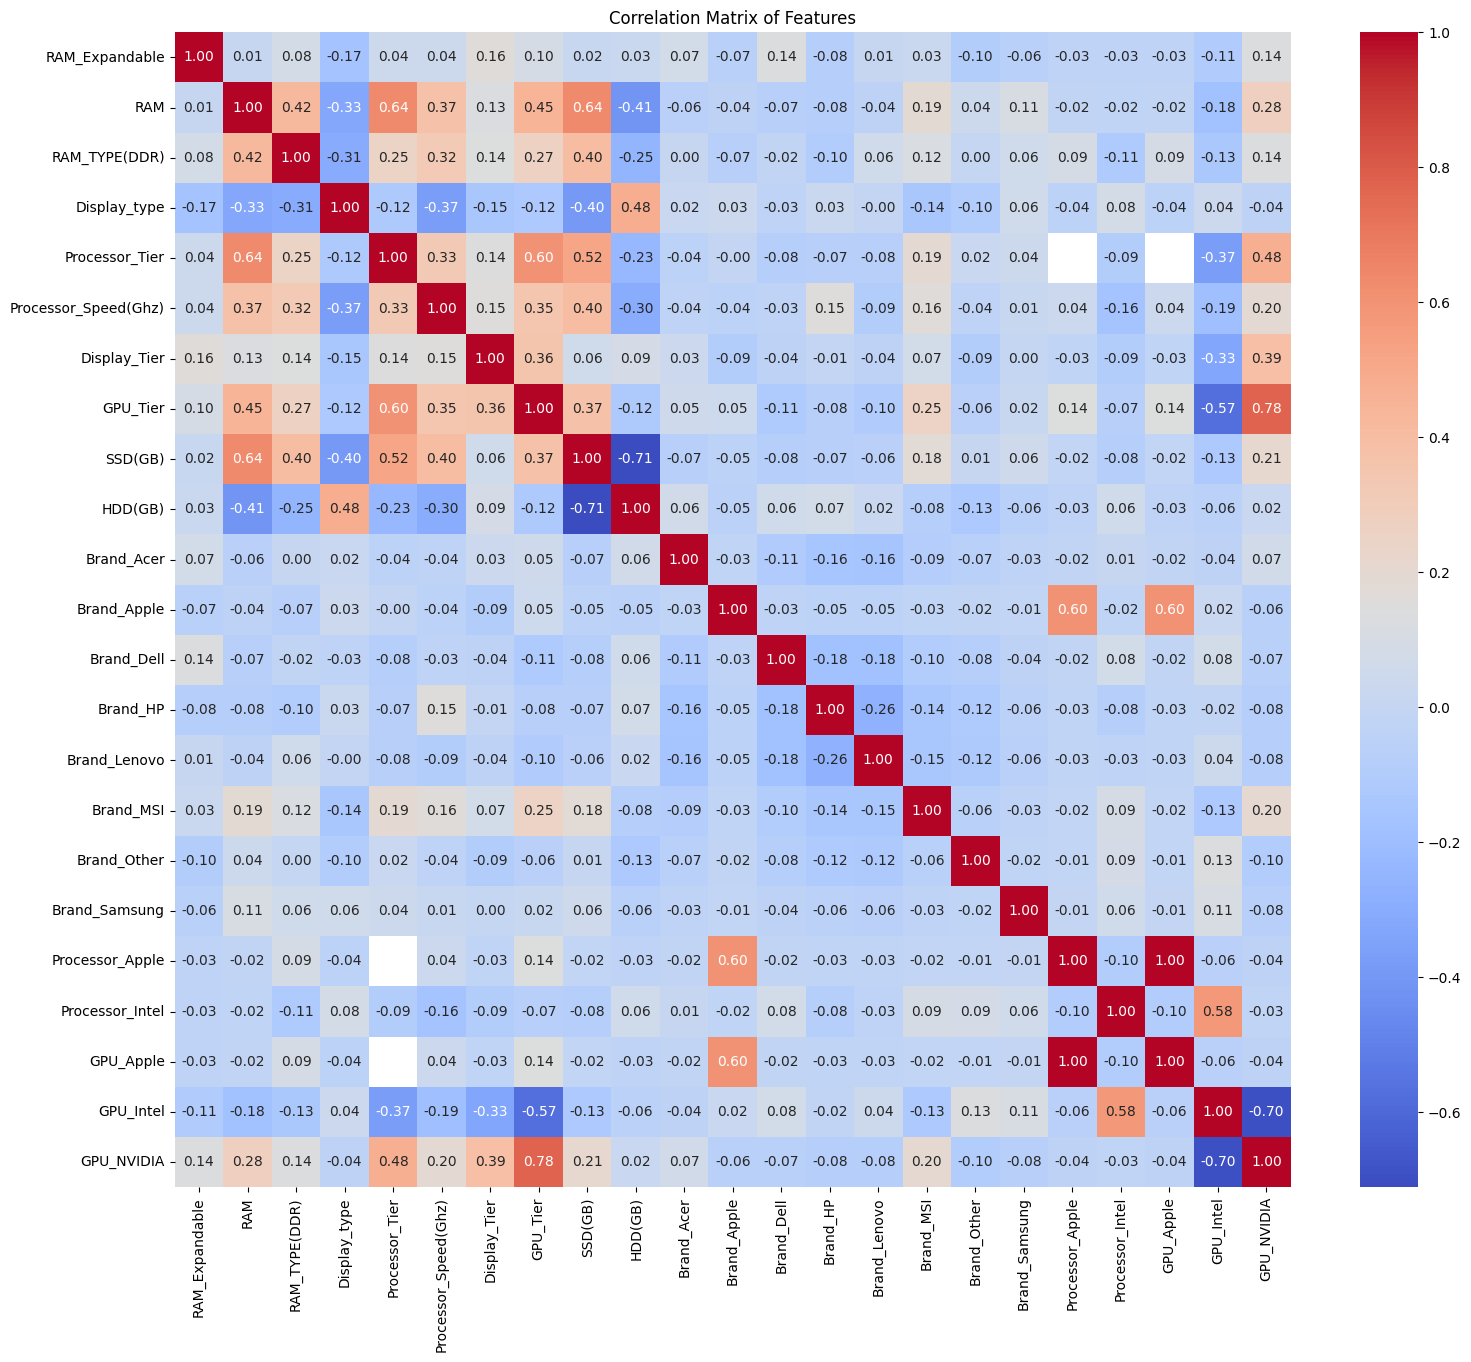

In [123]:
plt.figure(figsize=(18,15))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X.copy()

# 2. Fill NaN in Processor_Tier for VIF calculation
X_vif['Processor_Tier'] = X_vif['Processor_Tier'].fillna(-1)

# 3. Keep only numeric columns
X_vif = X_vif.select_dtypes(include=['int64', 'float64', 'uint8', 'bool'])

# 4. Convert all to float
X_vif = X_vif.astype(float)

# 5. Compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


                 Feature        VIF
20             GPU_Apple        inf
18       Processor_Apple        inf
2          RAM_TYPE(DDR)  40.364311
7               GPU_Tier  20.820129
1                    RAM  13.406239
6           Display_Tier  12.476171
5   Processor_Speed(Ghz)  11.349312
19       Processor_Intel  11.059253
8                SSD(GB)  11.008388
21             GPU_Intel  10.502574
22            GPU_NVIDIA   7.784553
4         Processor_Tier   6.318694
9                HDD(GB)   3.480511
3           Display_type   2.928241
0         RAM_Expandable   2.049256
13              Brand_HP   1.979687
14          Brand_Lenovo   1.943685
11           Brand_Apple   1.653212
12            Brand_Dell   1.554282
15             Brand_MSI   1.448043
10            Brand_Acer   1.386104
16           Brand_Other   1.292007
17         Brand_Samsung   1.103255


/usr/local/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [125]:
df_cleaned = df_encoded.copy()
# df_cleaned.to_csv("cleaned_laptop_data.csv", index=False)

In [127]:
df_cleaned['Processor_Tier'].value_counts(dropna=False)

Processor_Tier
1.0    1659
0.0    1054
2.0     824
NaN      11
Name: count, dtype: int64